<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 2. Визуальный анализ данных с Python
## <center>Часть 2. Пример визуального анализа данных

Считываем в DataFrame знакомые нам по [первой статье](https://habrahabr.ru/company/ods/blog/322626/) данные по оттоку клиентов телеком-оператора. 

In [1]:
from __future__ import division, print_function

# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
import pylab as plt

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv/weatherAUS.csv").dropna()

Проверим, все ли нормально считалось – посмотрим на первые 5 строк (метод `head`).

In [59]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049  2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
6050  2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
6052  2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
6053  2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
6054  2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
6049         SSW           48.0        ENE         SW           6.0   
6050           S           37.0        SSE        SSE          19.0   
6052         NNE           46.0        NNE        NNW          30.0   
6053         WNW           31.0        WNW        WSW           6.0   
6054         WNW           35.0         NW        WNW          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
6049          20.0         20.0         13.0       1006.3       1004.4   
6050          19.0         30.0          8.0       1012.9       1012.1   
6052          15.0         42.0         22.0       1012.3       1009.2   
6053           6.0         37.0         22.0       1012.7       1009.1   
6054          13.0         19.0         15.0       1010.7       1007.4   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
6049       2.0       5.0     26.6     33.4        No           No  
6050       1.0       1.0     20.3     27.0        No           No  
6052       1.0       6.0     28.7     34.9        No           No  
6053       1.0       5.0     29.1     35.6        No           No  
6054       1.0       6.0     33.6     37.6        No           No

Число строк (клиентов) и столбцов (признаков):

In [60]:
df.shape

(56420, 23)

Посмотрим на признаки и убедимся, что пропусков ни в одном из них нет – везде по 3333 записи.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

Описание признаков

|  Название  | Описание | Тип |
|---         |--:       |     |
| **State** | Буквенный код штата | номинальный |
| **Account length** | Как долго клиент обслуживается компанией | количественный |
| **Area code** | Префикс номера телефона | количественный  |
| **International plan** | Международный роуминг  (подключен/не подключен) | бинарный |
| **Voice mail plan** | Голосовая почта (подключена/не подключена) | бинарный |
| **Number vmail messages** | Количество голосовых сообщений | количественный |
| **Total day minutes** |  Общая длительность разговоров днем | количественный |
| **Total day calls** | Общее количество звонков днем | количественный |
| **Total day charge** | Общая сумма оплаты за услуги днем | количественный |
| **Total eve minutes** | Общая длительность разговоров вечером | количественный |
| **Total eve calls** | Общее количество звонков вечером | количественный |
| **Total eve charge** | Общая сумма оплаты за услуги вечером | количественный |
| **Total night minutes** | Общая длительность разговоров ночью | количественный |
| **Total night calls** | Общее количество звонков ночью | количественный |
| **Total night charge** | Общая сумма оплаты за услуги ночью | количественный |
| **Total intl minutes** | Общая длительность международных разговоров | количественный |
| **Total intl calls** | Общее количество международных разговоров | количественный |
| **Total intl charge** | Общая сумма оплаты за международные разговоры | количественный |
| **Customer service calls** | Число обращений в сервисный центр | количественный |

Целевая переменная: **Churn** – Признак оттока, бинарный (1 – потеря клиента, то есть отток). Потом мы будем строить модели, прогнозирующие этот признак по остальным, поэтому мы и назвали его целевым. 

Посмотрим на распределение целевого класса – оттока клиентов.

In [62]:
df["RainToday"].value_counts()

No     43958
Yes    12462
Name: RainToday, dtype: int64

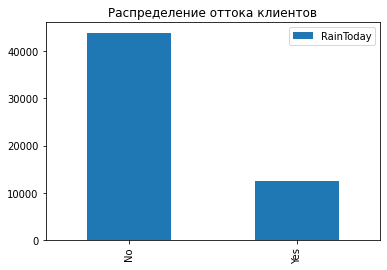

In [63]:
df["RainToday"].value_counts().plot(kind="bar", label="RainToday")
plt.legend()
plt.title("Распределение оттока клиентов");

Выделим следующие группы признаков (среди всех кроме *Churn* ):
 - бинарные: *International plan*, *Voice mail plan*
 - категориальные: *State*
 - порядковые: *Customer service calls*
 - количественные: все остальные

Посмотрим на корреляции количественных признаков. По раскрашенной матрице корреляций видно, что такие признаки как *Total day charge* считаются по проговоренным минутам (*Total day minutes*). То есть 4 признака можно выкинуть, они не несут полезной информации.

In [64]:
corr_matrix = df.drop(
    ["Location", "RainToday", "RainTomorrow", "Cloud3pm"], axis=1
).corr()

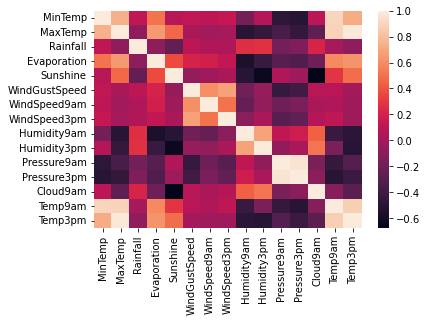

In [65]:
sns.heatmap(corr_matrix);

Теперь посмотрим на распределения всех интересующих нас количественных признаков. На бинарные/категориальные/порядковые признакие будем смотреть отдельно.

In [66]:
features = list(
    set(df.columns)
    - set(
        [
            "Location",
            "MinTemp",
            "Rainfall",
            "WindGustSpeed",
            "Humidity9am",
            "Pressure9am",
            "RainToday",
            "RainTomorrow",
        ]
    )
)

df[features].hist(figsize=(20, 12));

Видим, что большинство признаков распределены нормально. Исключения – число звонков в сервисный центр (*Customer service calls*) (тут больше подходит пуассоновское распределение) и число голосовых сообщений (*Number vmail messages*, пик в нуле, т.е. это те, у кого голосовая почта не подключена). Также смещено распределение числа международных звонков (*Total intl calls*).

Еще полезно строить вот такие картинки, где на главной диагонали рисуются распределения признаков, а вне главной диагонали – диаграммы рассеяния для пар признаков. Бывает, что это приводит к каким-то выводам, но в данном случае все примерно понятно, без сюрпризов. 

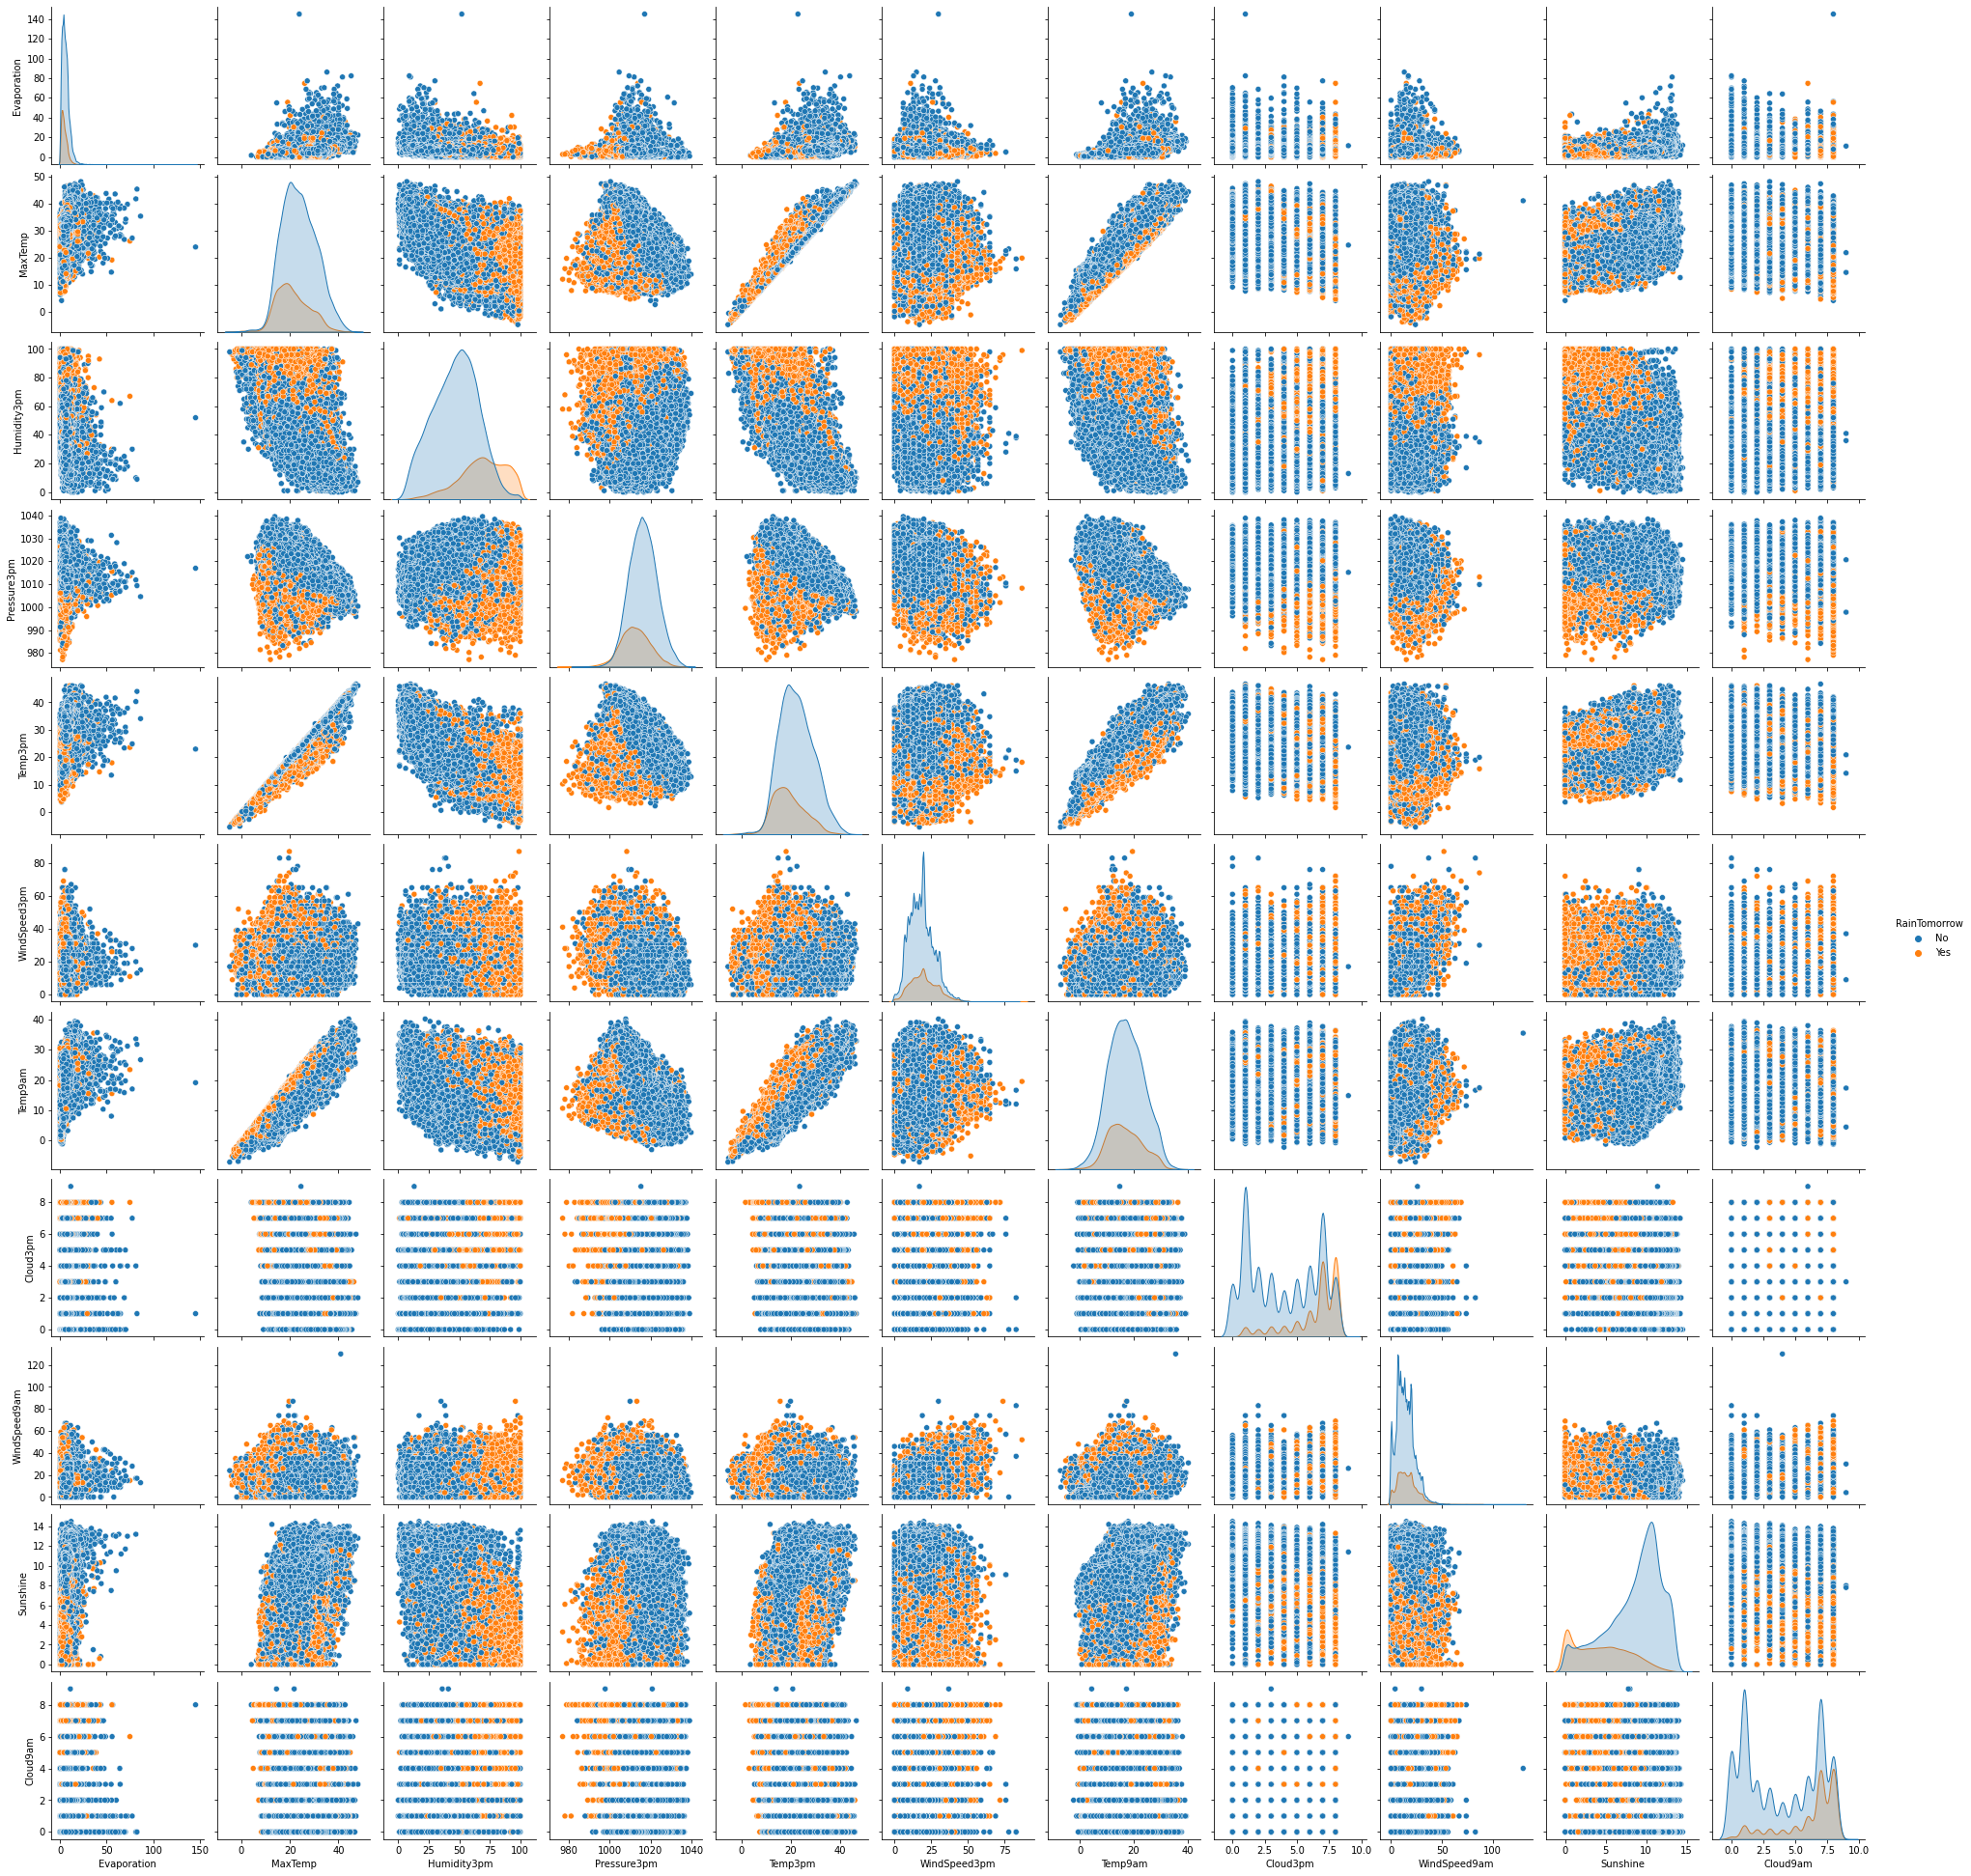

In [17]:
sns.pairplot(df[features + ["RainTomorrow"]], hue="RainTomorrow");

**Дальше посмотрим, как признаки связаны с целевым – с оттоком.**



Построим boxplot-ы, описывающее статистики распределения количественных признаков в двух группах: среди лояльных и ушедших клиентов. 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


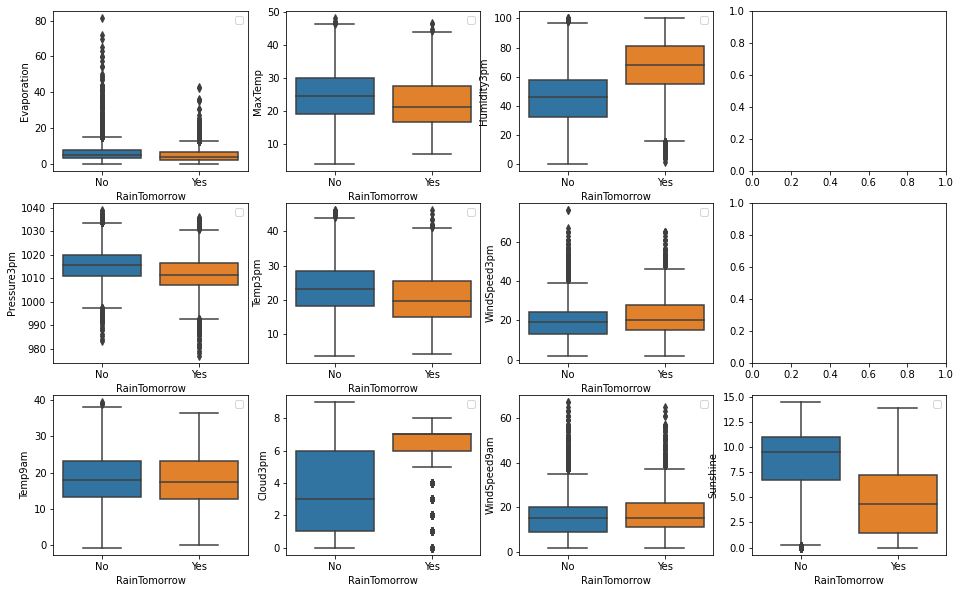

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in enumerate(features):
    if feat in ["Date", "Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "Cloud9am"]:
        continue
    sns.boxplot(x="RainTomorrow", y=feat, data=df, ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].legend()
    axes[int(idx / 4), idx % 4].set_xlabel("RainTomorrow")
    axes[int(idx / 4), idx % 4].set_ylabel(feat);

На глаз наибольшее отличие мы видим для признаков *Total day minutes*, *Customer service calls* и *Number vmail messages*. Впоследствии мы научимся определять важность признаков в задаче классификации с помощью случайного леса (или градиентного бустинга), и окажется, что первые два – действительно очень важные признаки для прогнозирования оттока.

Посмотрим отдельно на картинки с распределением кол-ва проговоренных днем минут среди лояльных/ушедших. Слева - знакомые нам боксплоты, справа – сглаженные гистограммы распределения числового признака в двух группах (скорее просто красивая картинка, все и так понятно по боксплоту).

Интересное **наблюдение:** в среднем ушедшие клиенты больше пользуются связью. Возможно, они недовольны тарифами, и одной из мер борьбы с оттоком будет понижение тарифных ставок (стоимости мобильной связи). Но это уже компании надо будет проводить дополнительный экономический анализ, действительно ли такие меры будут оправданы.

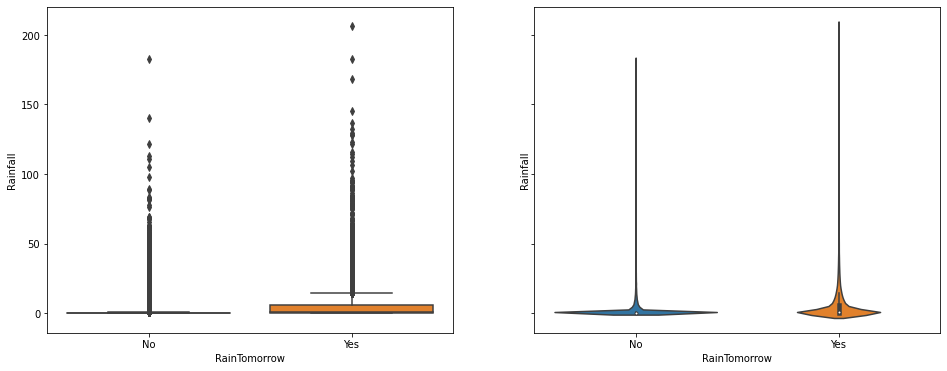

In [68]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

sns.boxplot(x="RainTomorrow", y="Rainfall", data=df, ax=axes[0])
sns.violinplot(x="RainTomorrow", y="Rainfall", data=df, ax=axes[1]);

Теперь изобразим распределение числа обращений в сервисный центр (такую картинку мы строили в первой статье). Тут уникальных значений признака не много (признак можно считать как количественным целочисленным, так и порядковым), и наглядней изобразить распределение с помощью `countplot`. **Наблюдение:** доля оттока сильно возрастает начиная с 4 звонков в сервисный центр.

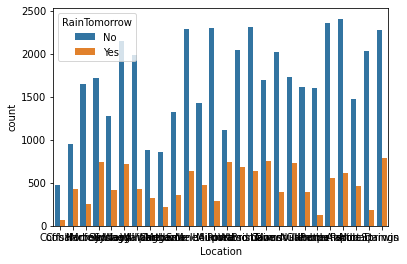

In [69]:
sns.countplot(x="Location", hue="RainTomorrow", data=df);

Теперь посмотрим на связь бинарных признаков *International plan* и *Voice mail plan* с оттоком. **Наблюдение**:  когда роуминг подключен, доля оттока намного выше, т.е. наличие междунароного роуминга – сильный признак. Про голосовую почту такого нельзя сказать. 

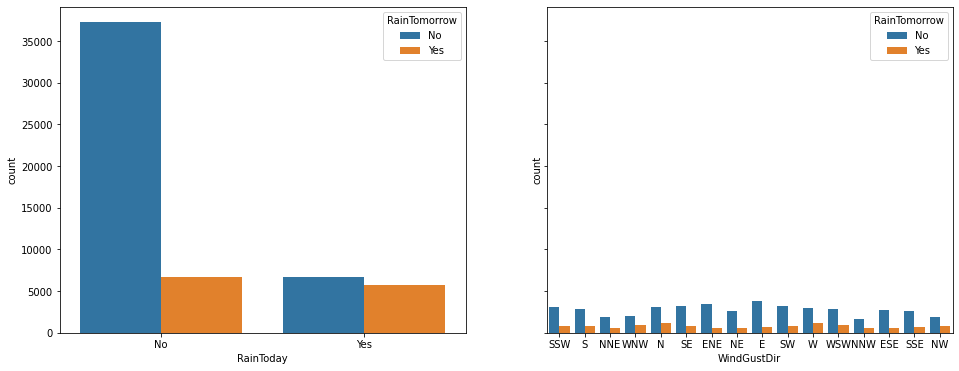

In [70]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

sns.countplot(x="RainToday", hue="RainTomorrow", data=df, ax=axes[0])
sns.countplot(x="WindGustDir", hue="RainTomorrow", data=df, ax=axes[1]);

Наконец, посмотрим, как с оттоком связан категориальный признак *State*. С ним уже не так приятно работать, поскольку число уникальных штатов довольно велико – 51. Можно в начале построить сводную табличку или посчитать процент оттока для каждого штата. Но мы видим, что данных по каждом штату по отдельности маловато (ушедших – всего от 3 до 17), поэтому, возможно, признак *State* впоследствии не стоит добавлять в модели классификации из-за риска *переобучения* (но мы это будем проверять на *кросс-валидации*, stay tuned!).

In [71]:
pd.crosstab(df["Location"], df["RainTomorrow"]).T

Location      AliceSprings  Brisbane  Cairns  Canberra  Cobar  CoffsHarbour  \
RainTomorrow                                                                  
No                    2036      2311    1693       859    471           949   
Yes                    187       642     751       219     63           431   

Location      Darwin  Hobart  Melbourne  MelbourneAirport  Mildura  Moree  \
RainTomorrow                                                                
No              2273    1471       1427              2293     2305   1655   
Yes              789     468        471               636      289    258   

Location      MountGambier  NorfolkIsland  Nuriootpa  Perth  PerthAirport  \
RainTomorrow                                                                
No                    1733           1721       1619   2409          2360   
Yes                    732            743        389    616           553   

Location      Portland  Sale  Sydney  SydneyAirport  Townsville  WaggaWagga  \
RainTomorrow                                                                  
No                1117  1319    1274           2155        2025        1989   
Yes                746   359     416            715         394         427   

Location      Watsonia  Williamtown  Woomera  
RainTomorrow                                  
No                2046          878     1605  
Yes                684          320      129

Доли оттока для каждого штата:

In [72]:
df.groupby(["RainTomorrow"])["Rainfall"].agg([np.mean]).sort_values(by="mean", ascending=False).T

RainTomorrow       Yes        No
mean          5.487302  1.182149

Видно, что в Нью-Джерси и Калифорнии доля оттока выше 25%, а на Гавайях и в Аляске меньше 5%. Но эти выводы построены на слишком скромной статистике и возможно, это просто особенности имеющихся данных (тут можно и гипотезы попроверять про корреляции Мэтьюса и Крамера, но это уже за рамками данной статьи).

Наконец построим t-SNE представление данных. Название метода сложное – t-distributed Stohastic Neighbor Embedding, математика тоже крутая (и вникать в нее не будем), но основная идея проста, как дверь: найдем такое отображение из многомерного признакового пространства на плоскость (или в 3D, но почти всегда выбирают 2D), чтоб точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки – также отобразились на близкие. То есть neighbor embedding – это своего рода поиск нового представления данных, при котором сохраняется соседство. 

Немного деталей: выкинем штаты и признак оттока, бинарные Yes/No-признаки переведем в числа (при помощи [`pandas.Series.map`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html)). Также нужно масштабировать выборку – из каждого признака вычесть его среднее и поделить на стандартное отклонение, это делае `StandardScaler`.

In [73]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [74]:
# преобразуем все признаки в числовые, выкинув штаты
X = df.drop(["RainTomorrow", "Location", "Date", "WindDir9am", "WindDir3pm"], axis=1)
X["RainToday"] = X["RainToday"].map({"Yes": 1, "No": 0})
X["WindGustDir"] = X["WindGustDir"].map({"S": 3, "N": 2,"W": 1, "E": 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 14.5 µs


ValueError: ignored

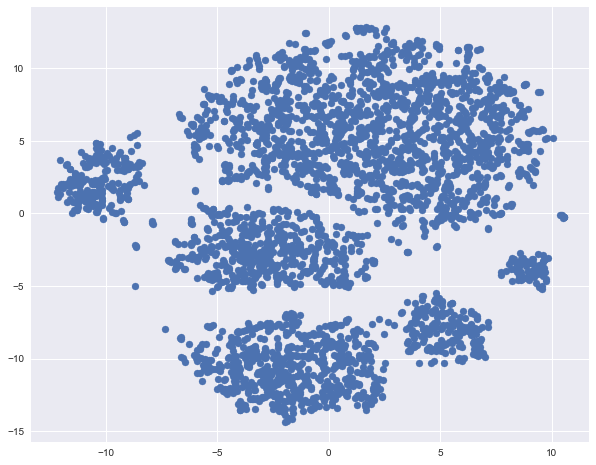

In [ ]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

Раскрасим полученное t-SNE представление данных по оттоку (синие – лояльные, оранжевые – ушедшие клиенты).

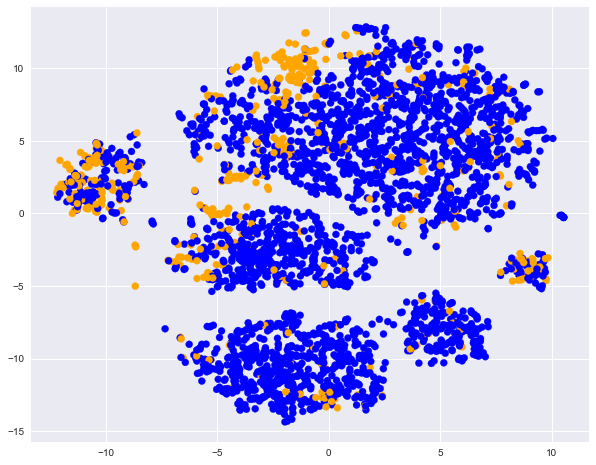

In [ ]:
plt.scatter(
    tsne_representation[:, 0],
    tsne_representation[:, 1],
    c=df["RainTomorrow"].map({0: "blue", 1: "orange"}),
);

Видим, что ушедшие клиенты преимущественно "кучкуются" в некоторых областях признакового пространства. 


Чтоб лучше понять картинку, можно также раскрасить ее по остальным бинарным признакам – по роумингу и голосовой почте. Синие участки соответствуют объектам, обладающим этим бинарным признаком.

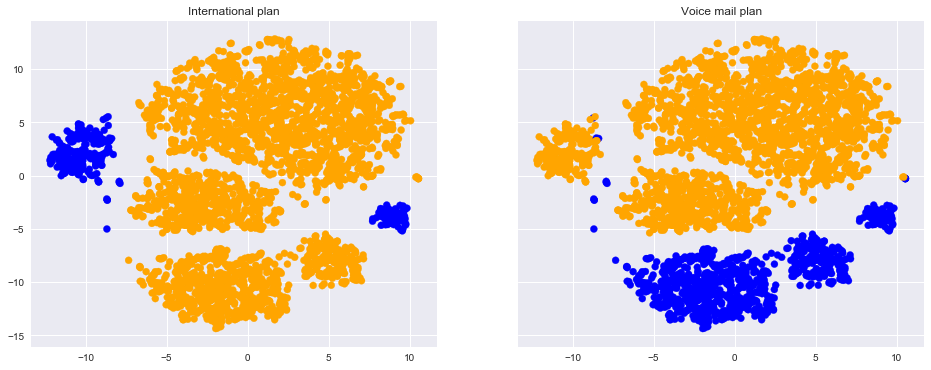

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

axes[0].scatter(
    tsne_representation[:, 0],
    tsne_representation[:, 1],
    c=df["RainToday"].map({"Yes": "blue", "No": "orange"}),
)   
axes[1].scatter(
    tsne_representation[:, 0],
    tsne_representation[:, 1],
    c=df["WindGustDir"].map({"S": "blue", "N": "orange", "W": "green", "E": "black"}),
)
axes[0].set_title("RainToday")
axes[1].set_title("WindGustDir");

Теперь понятно, что, например, много ушедших клиентов кучкуется в левом кластере людей с поключенным роумингом, но без голосовой почты. 

Напоследок отметим минусы t-SNE (да, по нему тоже лучше писать отдельную статью):
 - большая вычислительная сложность. Вот эта реализация sklearn скорее всего не поможет в Вашей реальной задаче, на выборках побольше стоит посмотреть в сторону [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE);
 - картинка может сильно поменяться при изменении `random seed`, это усложняет интерпретацию. [Вот](http://distill.pub/2016/misread-tsne/) хороший тьюториал по t-SNE. Но в целом по таким картинкам не стоит делать далеко идущих выводов – не стоит гадать по кофейной гуще. Иногда что-то бросается в глаза и подтверждается при изучении, но это не часто происходит.
 
Вот еще пара картинок. С помощью t-SNE можно действительно получить хорошее представление о данных (как в случае с рукописными цифрами, [вот](https://colah.github.io/posts/2014-10-Visualizing-MNIST/) хорошая статья), так и просто нарисовать елочную игрушку. 

<img src='../../img/tsne_mnist.png' />

<img src='../../img/tsne_christmas_toy.jpg'/>